<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RNNs-for-time-series-prediction" data-toc-modified-id="RNNs-for-time-series-prediction-1">RNNs for time series prediction</a></span><ul class="toc-item"><li><span><a href="#Time-series" data-toc-modified-id="Time-series-1.1">Time series</a></span></li><li><span><a href="#Baselines" data-toc-modified-id="Baselines-1.2">Baselines</a></span><ul class="toc-item"><li><span><a href="#Naive" data-toc-modified-id="Naive-1.2.1">Naive</a></span></li><li><span><a href="#Fully-connected-network" data-toc-modified-id="Fully-connected-network-1.2.2">Fully connected network</a></span></li></ul></li><li><span><a href="#Simple-RNN" data-toc-modified-id="Simple-RNN-1.3">Simple RNN</a></span></li><li><span><a href="#Deep-RNN" data-toc-modified-id="Deep-RNN-1.4">Deep RNN</a></span><ul class="toc-item"><li><span><a href="#One-step-prediction" data-toc-modified-id="One-step-prediction-1.4.1">One step prediction</a></span></li><li><span><a href="#Predict-several-steps-ahead" data-toc-modified-id="Predict-several-steps-ahead-1.4.2">Predict several steps ahead</a></span></li></ul></li></ul></li></ul></div>

## RNNs for time series prediction

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow.keras as keras

### Time series

In [5]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)

    time = np.linspace(0, 1, n_steps)
    
    # wave 1
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    # wave2
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    # noise
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    
    return series[..., np.newaxis].astype(np.float32)

generate_time_series(2, 5)

array([[[-0.2840637 ],
        [-0.1182277 ],
        [-0.21091172],
        [-0.08119753],
        [-0.14346898]],

       [[-0.18569258],
        [ 0.3468207 ],
        [-0.10555648],
        [ 0.16783413],
        [-0.06385503]]], dtype=float32)

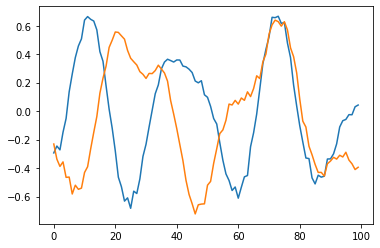

In [20]:
plt.plot(generate_time_series(2, 100)[0]);
plt.plot(generate_time_series(2, 100)[1]);

In [142]:
n_steps = 50
split1 = 7000
split2 = 9000

series = generate_time_series(10000, n_steps + 1)

X_train, y_train = series[:split1, :n_steps], series[:split1, -1]
X_valid, y_valid = series[split1:split2, :n_steps], series[split1:split2, -1]
X_test, y_test = series[split2:, n_steps], series[split2:, -1]

### Baselines

#### Naive

In [25]:
y_pred = X_valid[:, -1]

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020583153

#### Fully connected network

In [34]:
epochs = 20

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 162us/sample - loss: 0.3335 - val_loss: 0.2011
Epoch 2/20
7000/7000 [==============================] - 0s 70us/sample - loss: 0.1600 - val_loss: 0.1185
Epoch 3/20
7000/7000 [==============================] - 0s 67us/sample - loss: 0.1034 - val_loss: 0.0868
Epoch 4/20
7000/7000 [==============================] - 0s 59us/sample - loss: 0.0788 - val_loss: 0.0705
Epoch 5/20
7000/7000 [==============================] - 0s 59us/sample - loss: 0.0649 - val_loss: 0.0601
Epoch 6/20
7000/7000 [==============================] - 1s 78us/sample - loss: 0.0556 - val_loss: 0.0523
Epoch 7/20
7000/7000 [==============================] - 0s 69us/sample - loss: 0.0486 - val_loss: 0.0462
Epoch 8/20
7000/7000 [==============================] - 0s 67us/sample - loss: 0.0431 - val_loss: 0.0412
Epoch 9/20
7000/7000 [==============================] - 0s 62us/sample - loss: 0.0386 - val_loss: 0.0372
Epoch 

In [35]:
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.018108191

### Simple RNN

In [36]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

model.fit(X_train, y_train, epochs=epochs,
          validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.3128 - val_loss: 0.2972
Epoch 2/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.2618 - val_loss: 0.2485
Epoch 3/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.2173 - val_loss: 0.2061
Epoch 4/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.1791 - val_loss: 0.1698
Epoch 5/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.1471 - val_loss: 0.1396
Epoch 6/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.1208 - val_loss: 0.1151
Epoch 7/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0997 - val_loss: 0.0955
Epoch 8/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0829 - val_loss: 0.0801
Epoch 9/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0698 - val_loss: 0.0679
Epoch 10/20
7000

In [37]:
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.024152908

### Deep RNN

#### One step prediction

In [116]:
# sequence-to-vector model
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

model.fit(X_train, y_train, epochs=epochs,
          validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.1141 - val_loss: 0.0571
Epoch 2/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0459 - val_loss: 0.0405
Epoch 3/20
7000/7000 [==============================] - 16s 2ms/sample - loss: 0.0341 - val_loss: 0.0315
Epoch 4/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0273 - val_loss: 0.0258
Epoch 5/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0230 - val_loss: 0.0220
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0199 - val_loss: 0.0193
Epoch 7/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0176 - val_loss: 0.0172
Epoch 8/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0158 - val_loss: 0.0156
Epoch 9/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.0144 - val_loss: 0.0145
Epoch 1

In [117]:
y_pred = model.predict(X_valid)

np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.008582104

#### Predict several steps ahead 

In [169]:
steps_ahead = 10

series = generate_time_series(10000, n_steps + steps_ahead)

X_train = series[:split1, :n_steps]
X_valid = series[split1:split2, :n_steps]
X_test = series[split2:, n_steps]

Y = np.empty((10000, n_steps, steps_ahead))

for step in range(1, steps_ahead + 1):
    Y[:, :, step - 1] = series[:, step: step + n_steps, 0]
    
Y_train = Y[:split1]
Y_valid = Y[split1:split2]
Y_test = Y[split2:]

In [170]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    # time distribution
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [171]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])


model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=[last_time_step_mse])

model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.1945 - last_time_step_mse: 0.1954 - val_loss: 0.1588 - val_last_time_step_mse: 0.1524
Epoch 2/20
7000/7000 [==============================] - 16s 2ms/sample - loss: 0.1483 - last_time_step_mse: 0.1377 - val_loss: 0.1391 - val_last_time_step_mse: 0.1283
Epoch 3/20
7000/7000 [==============================] - 16s 2ms/sample - loss: 0.1330 - last_time_step_mse: 0.1201 - val_loss: 0.1269 - val_last_time_step_mse: 0.1145
Epoch 4/20
7000/7000 [==============================] - 18s 3ms/sample - loss: 0.1224 - last_time_step_mse: 0.1088 - val_loss: 0.1177 - val_last_time_step_mse: 0.1047
Epoch 5/20
7000/7000 [==============================] - 17s 2ms/sample - loss: 0.1142 - last_time_step_mse: 0.1004 - val_loss: 0.1104 - val_last_time_step_mse: 0.0968
Epoch 6/20
7000/7000 [==============================] - 15s 2ms/sample - loss: 0.1076 - last_time_step_mse: 0.0936 - 

In [173]:
series = generate_time_series(1, n_steps + steps_ahead)

X_new, Y_new = series[:, :n_steps, :], series[:, n_steps:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]